In [187]:
import extended_stp as stp
import torch
from torch import nn
import torch.nn.utils.parametrize as parametrize
import matplotlib.pyplot as plt

[autoreload of train_parity failed: Traceback (most recent call last):
  File "C:\Users\james\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\james\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\importlib\__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 991, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1129, in get_code
  File "<frozen importlib._bootstrap_external>", line 1059, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "c:\Users\james\OneDrive - University of Cambridge\Part IIB Project\iib-project\code\00

tensor([0.6216, 1.0397, 1.6216])


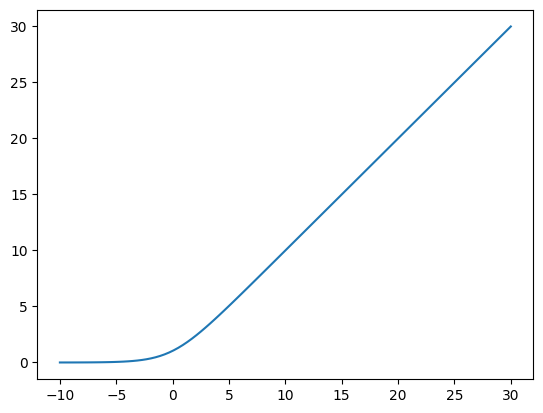

In [191]:
for alpha in (1.5,):#(0.5, 1, 1.5, 2, 2.5, 5):
    m = stp.RecurrentLayer(alpha=alpha)
    times = torch.linspace(-10, 30, 100)
    x = m.compute_R(times)
    #print(x)
    plt.plot(times, x)
    print(m.compute_R(torch.Tensor([-1, 0, 1])))

In [ ]:

import train_parity as parity

x:torch.Tensor = parity.get_random_sequences_and_parity(6, 4)
print(x)

(tensor([[1, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 0, 1],
        [1, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 1, 1]]), tensor([ True,  True,  True,  True, False,  True]))


: 

In [190]:
class M(nn.Module):
    def __init__(self):
        super().__init__()
        self.x = nn.Parameter(torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]]))

m = M()
parametrize.register_parametrization(m, "x", nn.Softplus(beta=1/0.1, threshold=1))
#m.parametrizations.x.original = nn.Parameter(torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]]))
print(m.parametrizations.x.original)
print(m.x)
nn.init.kaiming_normal_(m.parametrizations.x.original, nonlinearity="relu")
print(m.parametrizations.x.original)
print(m.x)

Parameter containing:
tensor([[0., 1., 2.],
        [3., 4., 5.]], requires_grad=True)
tensor([[0.0693, 1.0000, 2.0000],
        [3.0000, 4.0000, 5.0000]], grad_fn=<SoftplusBackward0>)
Parameter containing:
tensor([[ 0.3453,  0.7951, -2.2458],
        [ 0.3651, -0.1827,  0.7117]], requires_grad=True)
tensor([[3.4529e-01, 7.9509e-01, 1.7653e-11],
        [3.6512e-01, 1.4924e-02, 7.1173e-01]], grad_fn=<SoftplusBackward0>)


0
tensor([0., 1., 1., 0.], device='cuda:0')


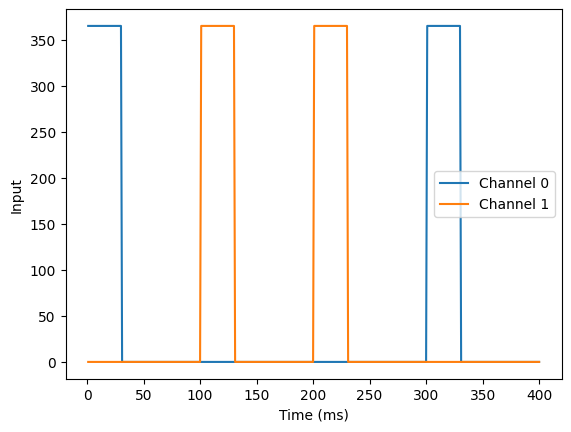

tensor([1., 1., 1., 0.], device='cuda:0')


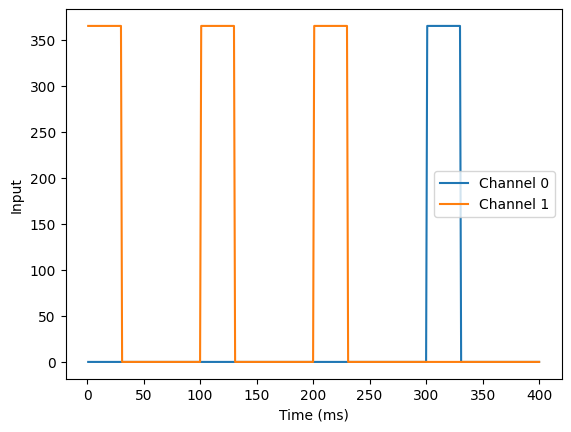

tensor([0., 0., 0., 1.], device='cuda:0')


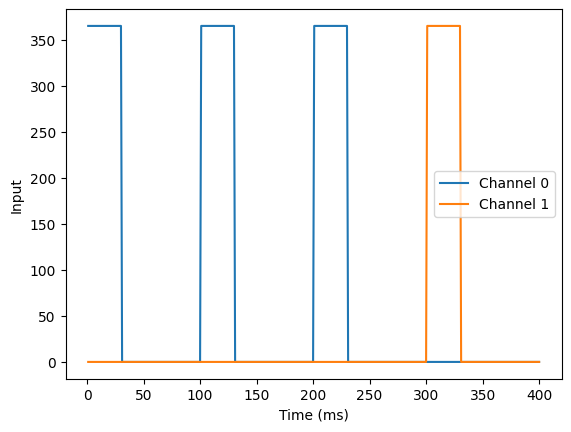

tensor([1., 1., 1., 1.], device='cuda:0')


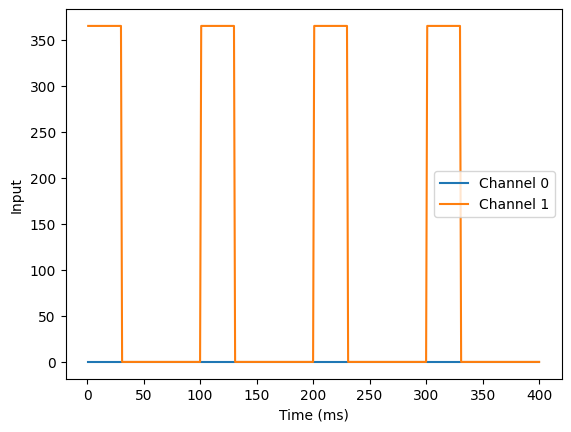

tensor([0., 0., 1., 0.], device='cuda:0')


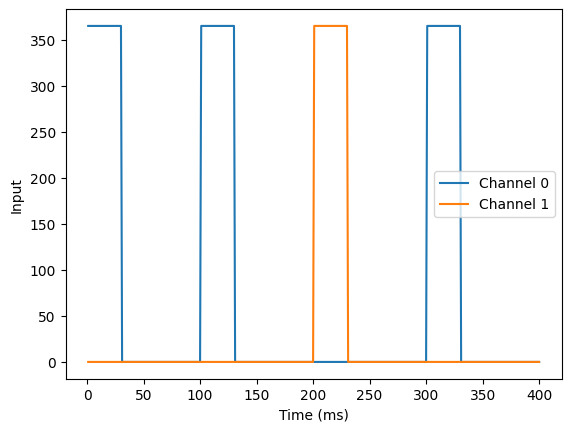

tensor([1., 0., 0., 1.], device='cuda:0')


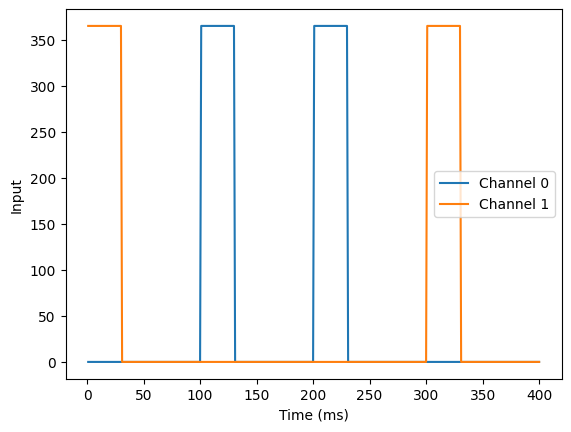

1
tensor([1., 0., 0., 0.], device='cuda:0')


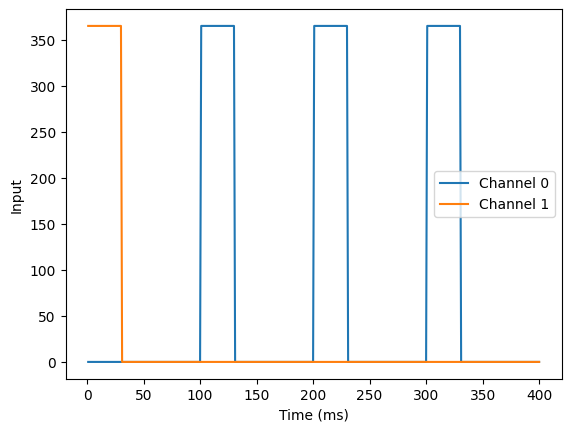

tensor([0., 0., 1., 1.], device='cuda:0')


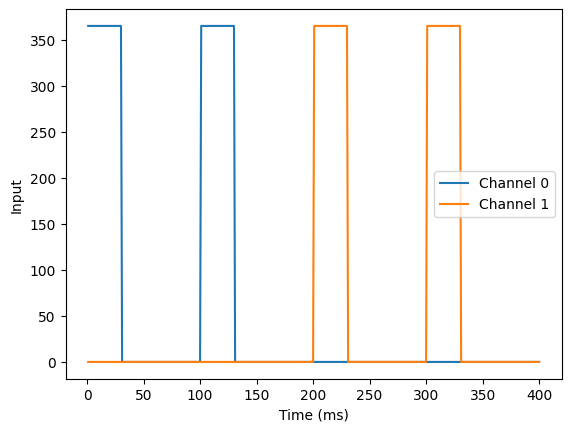

tensor([0., 1., 0., 0.], device='cuda:0')


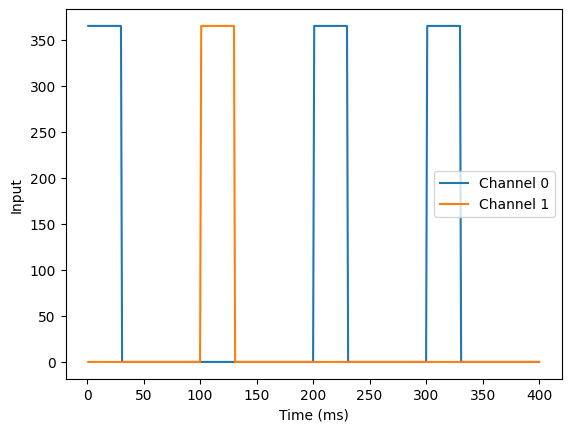

tensor([0., 1., 1., 1.], device='cuda:0')


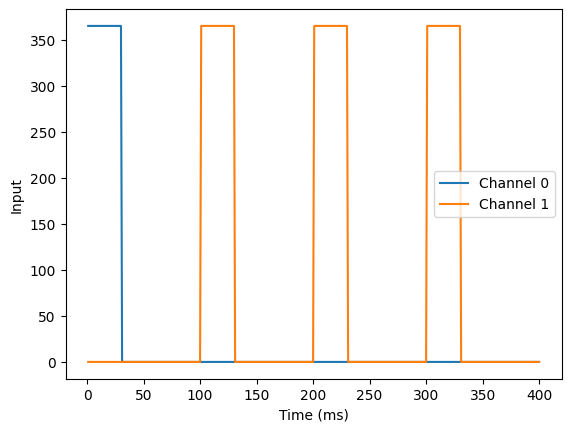

tensor([0., 0., 1., 1.], device='cuda:0')


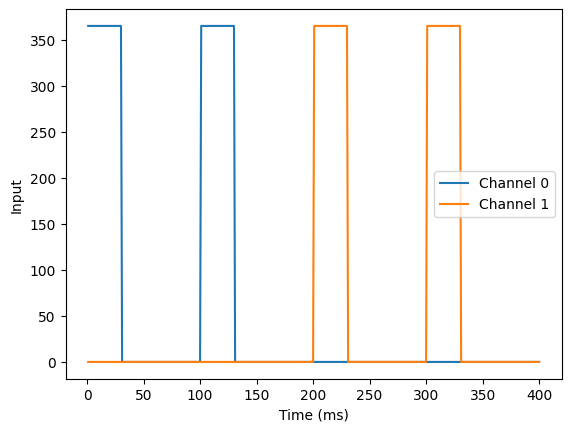

tensor([0., 0., 0., 0.], device='cuda:0')


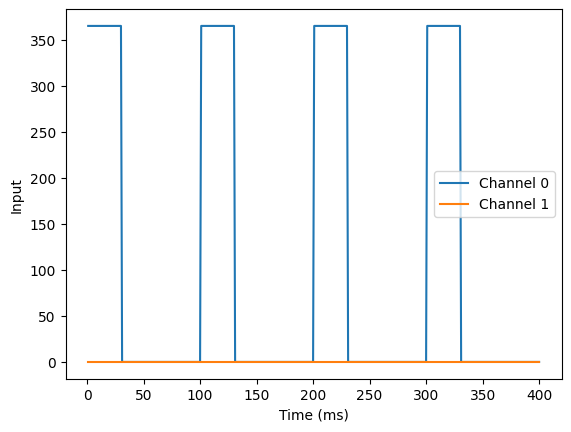

2
tensor([1., 0., 0., 0.], device='cuda:0')


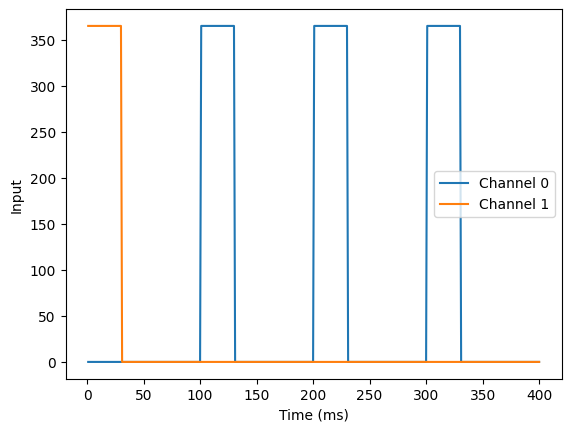

tensor([0., 1., 0., 1.], device='cuda:0')


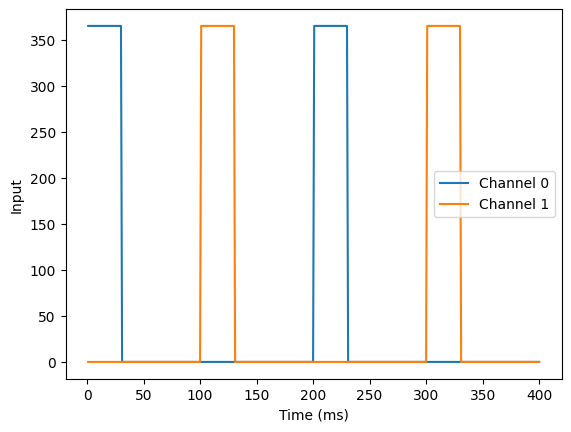

tensor([1., 1., 0., 0.], device='cuda:0')


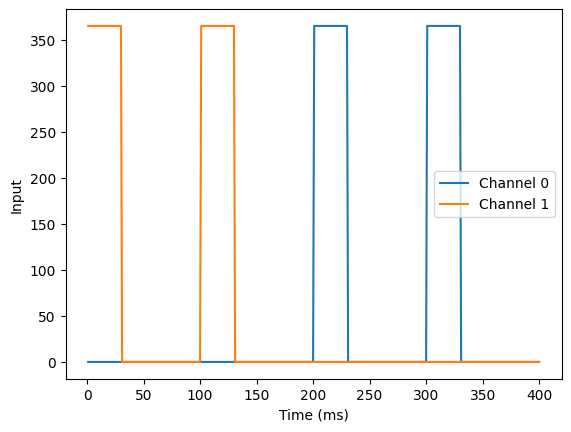

tensor([0., 0., 1., 1.], device='cuda:0')


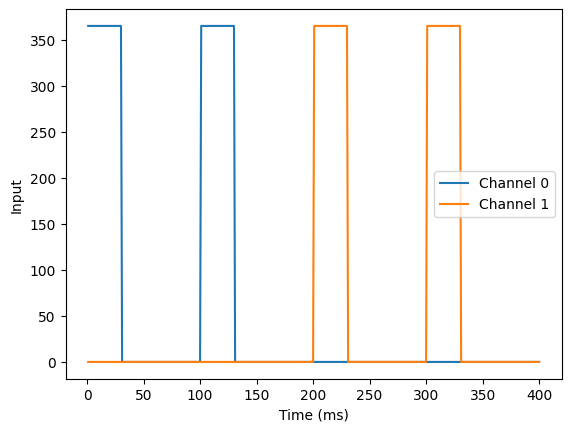

tensor([0., 0., 0., 0.], device='cuda:0')


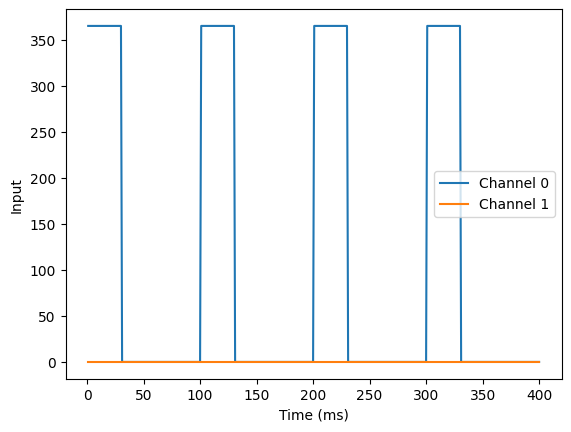

tensor([0., 1., 0., 1.], device='cuda:0')


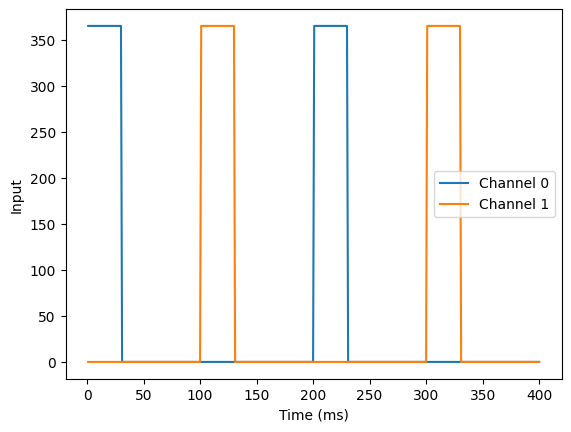

3
tensor([1., 1., 0., 1.], device='cuda:0')


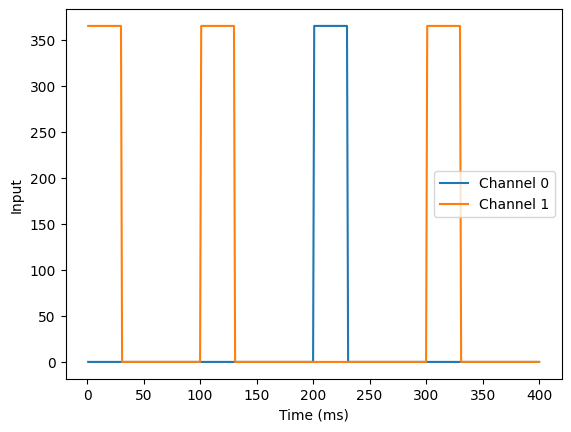

tensor([0., 0., 1., 0.], device='cuda:0')


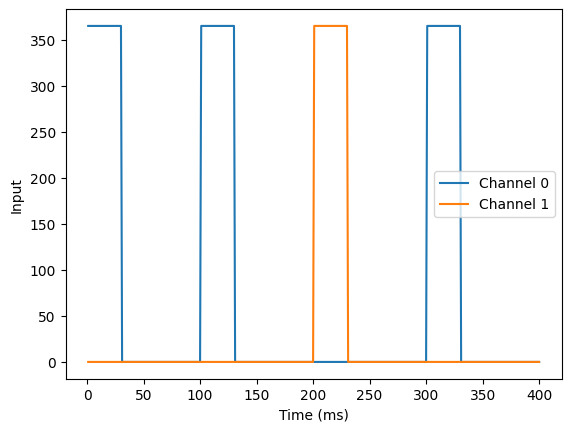

tensor([1., 0., 1., 0.], device='cuda:0')


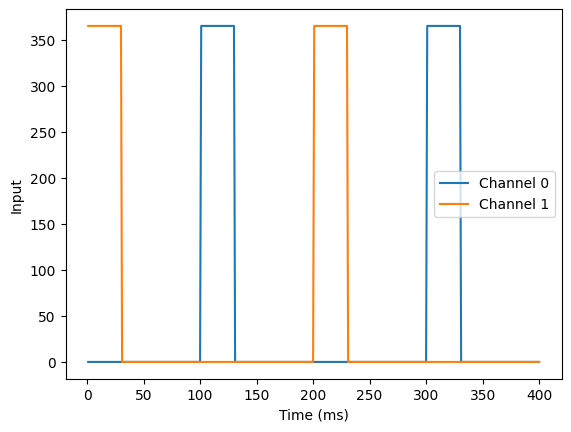

tensor([1., 1., 1., 0.], device='cuda:0')


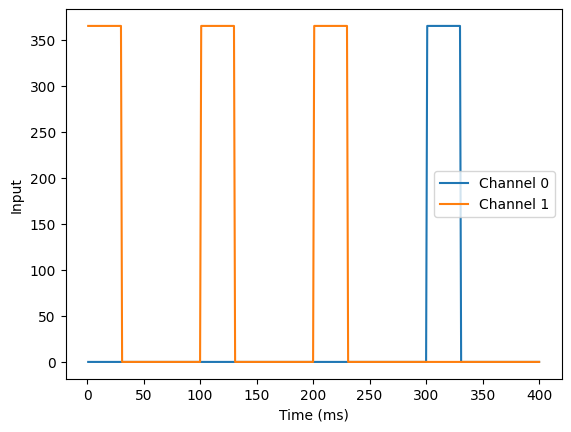

tensor([1., 0., 1., 0.], device='cuda:0')


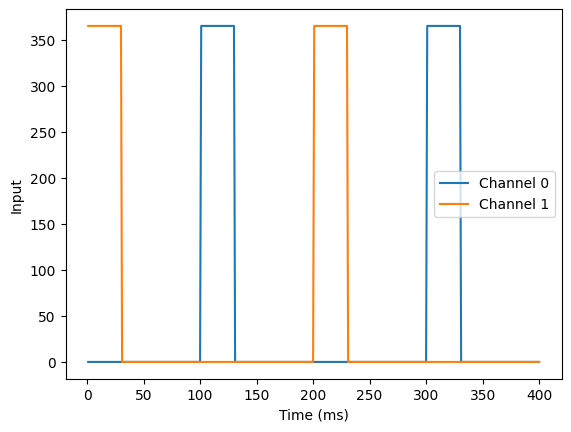

tensor([0., 1., 1., 0.], device='cuda:0')


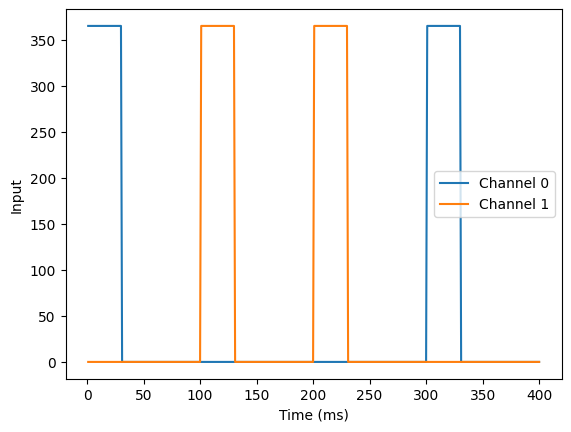

4
tensor([0., 1., 1., 0.], device='cuda:0')


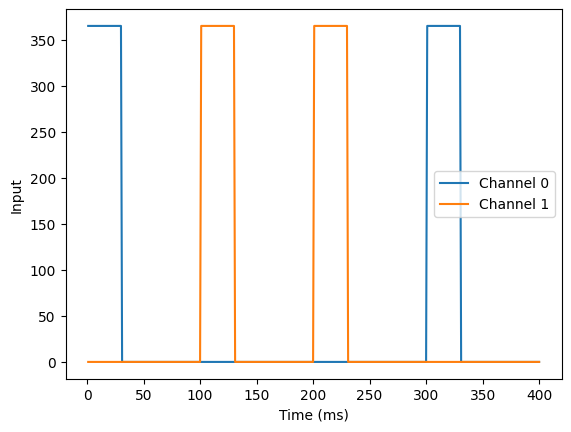

tensor([1., 0., 1., 1.], device='cuda:0')


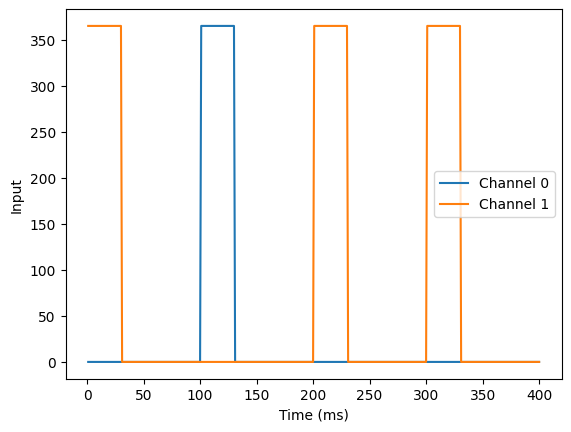

tensor([0., 1., 0., 0.], device='cuda:0')


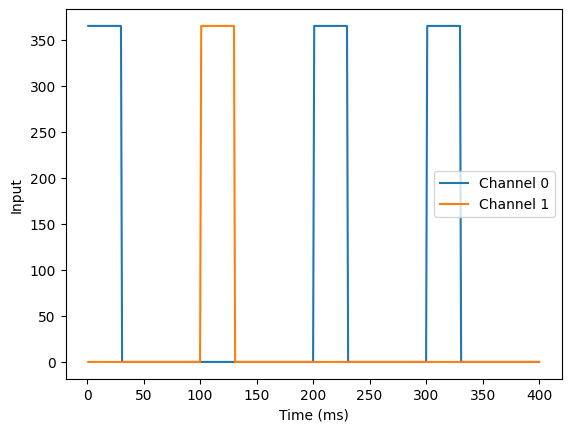

tensor([1., 1., 0., 1.], device='cuda:0')


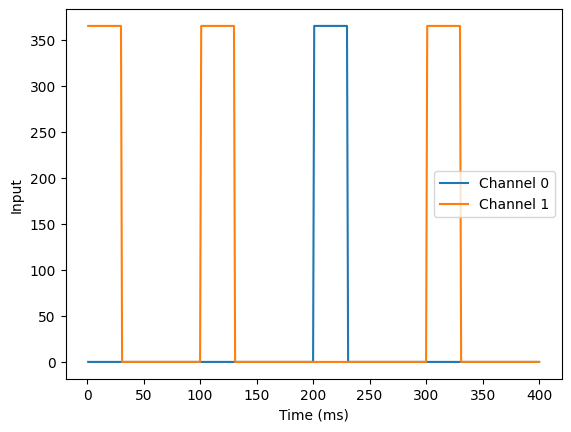

tensor([0., 1., 1., 1.], device='cuda:0')


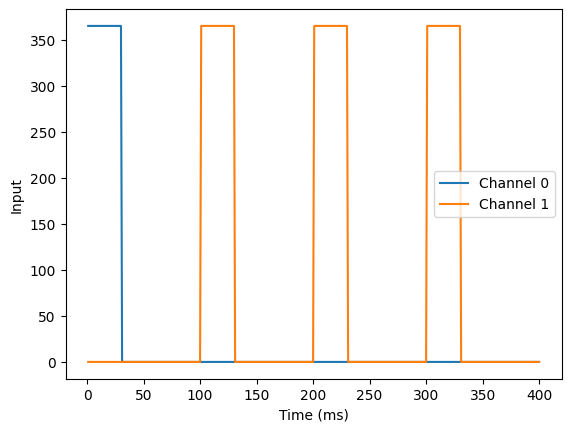

tensor([0., 1., 1., 1.], device='cuda:0')


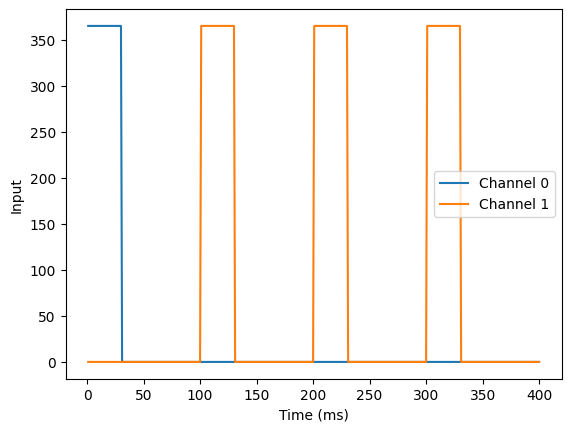

5
tensor([1., 1., 0., 0.], device='cuda:0')


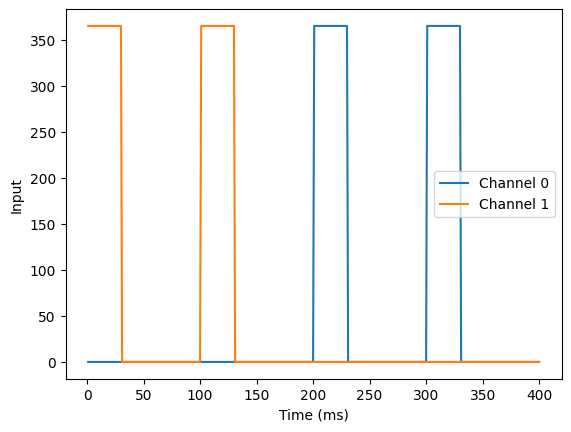

tensor([1., 1., 0., 0.], device='cuda:0')


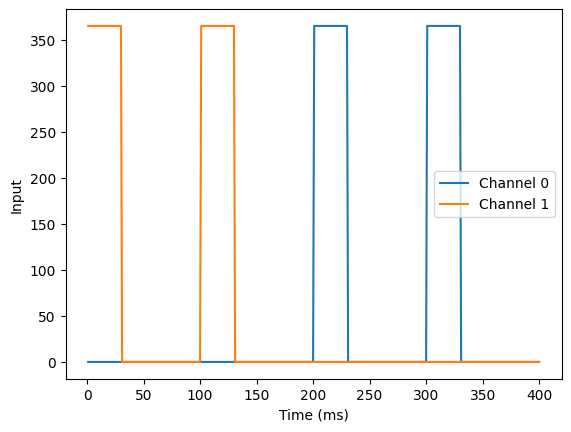

tensor([0., 0., 0., 0.], device='cuda:0')


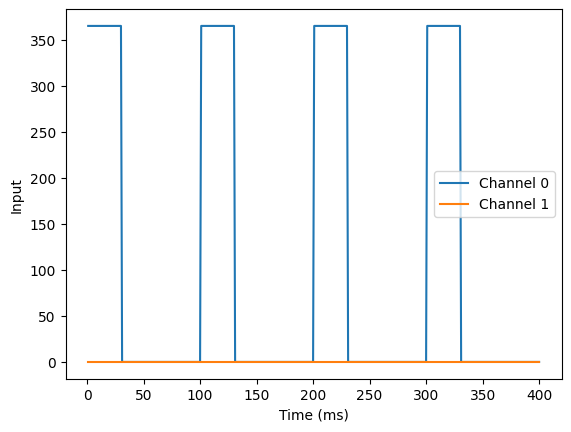

tensor([0., 1., 0., 1.], device='cuda:0')


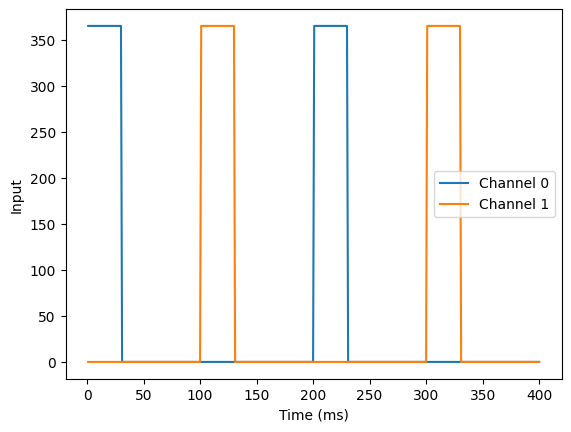

tensor([1., 1., 0., 0.], device='cuda:0')


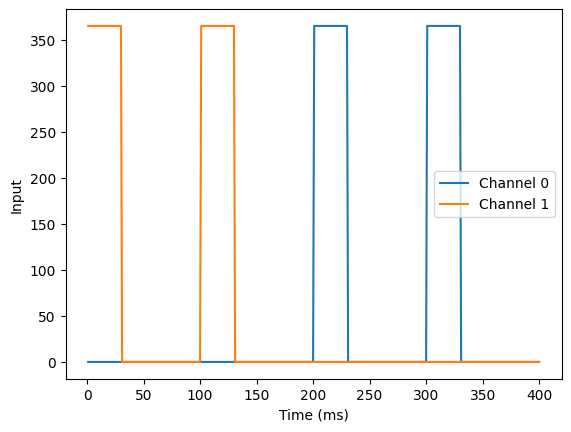

tensor([1., 0., 0., 1.], device='cuda:0')


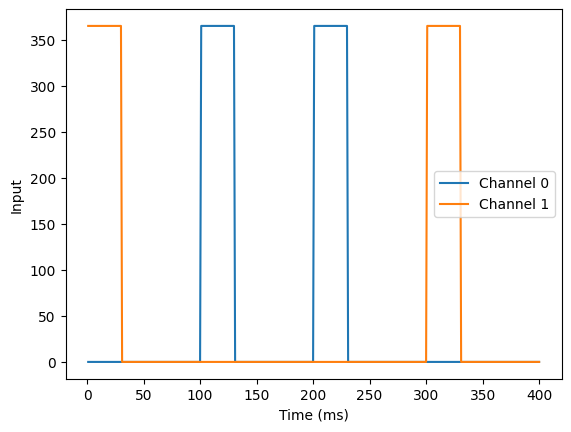

6
tensor([1., 0., 0., 0.], device='cuda:0')


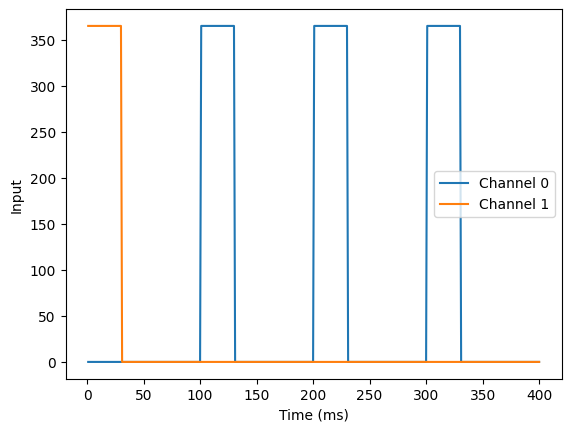

tensor([1., 0., 1., 1.], device='cuda:0')


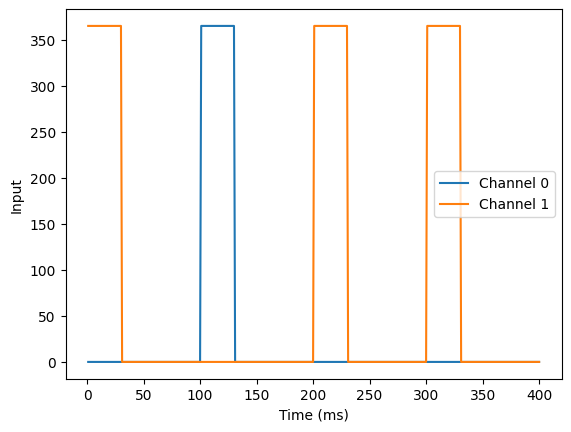

tensor([0., 1., 1., 0.], device='cuda:0')


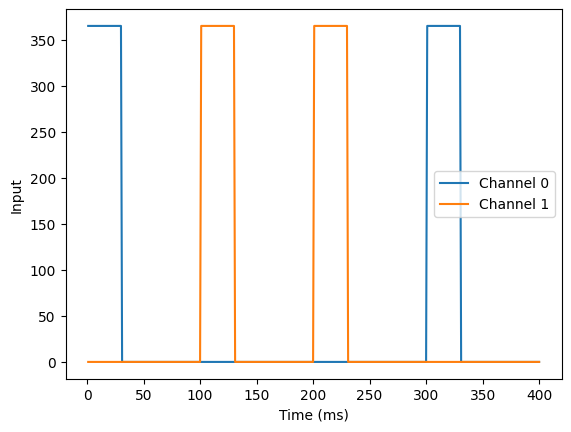

tensor([1., 1., 0., 1.], device='cuda:0')


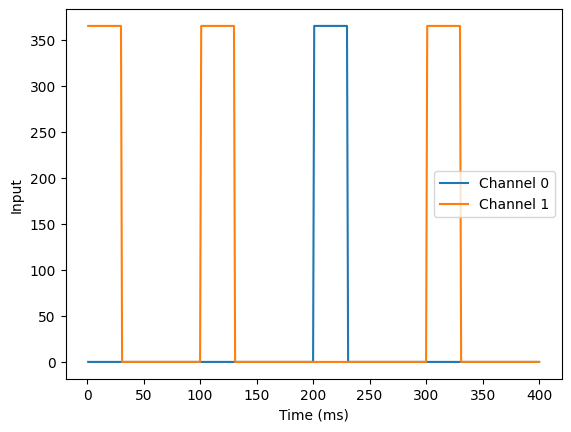

tensor([0., 1., 0., 1.], device='cuda:0')


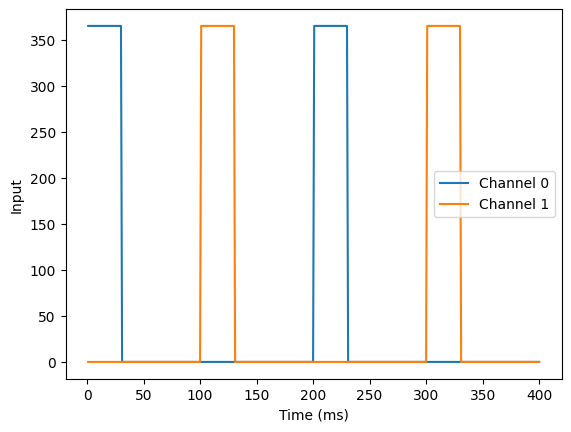

tensor([0., 1., 0., 1.], device='cuda:0')


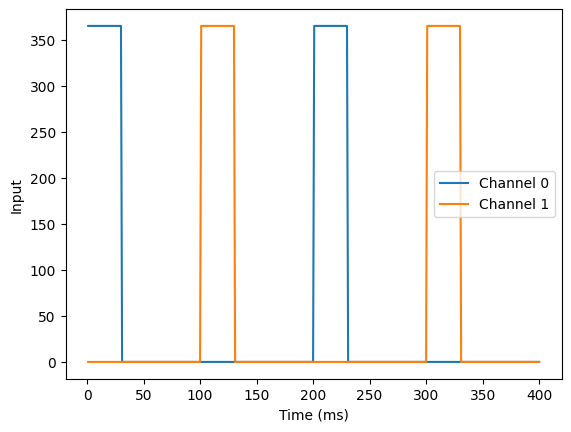

7
tensor([0., 1., 1., 1.], device='cuda:0')


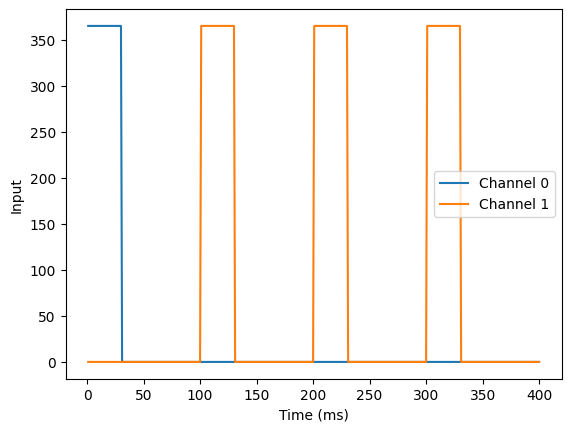

tensor([1., 1., 0., 1.], device='cuda:0')


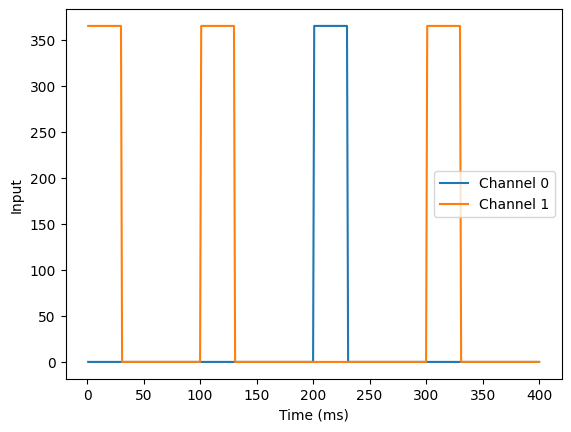

tensor([1., 0., 0., 1.], device='cuda:0')


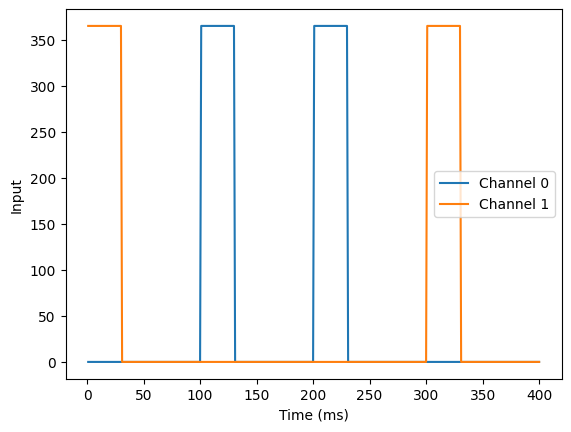

tensor([0., 1., 1., 1.], device='cuda:0')


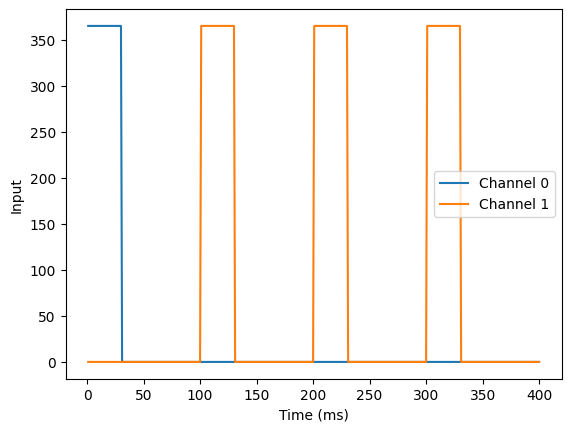

tensor([0., 1., 0., 0.], device='cuda:0')


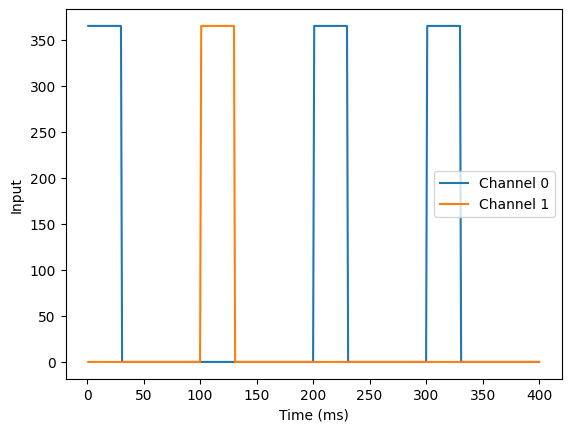

tensor([1., 0., 1., 1.], device='cuda:0')


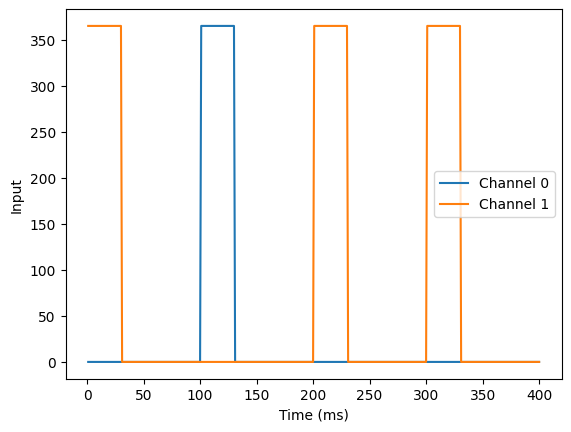

8
tensor([0., 1., 0., 1.], device='cuda:0')


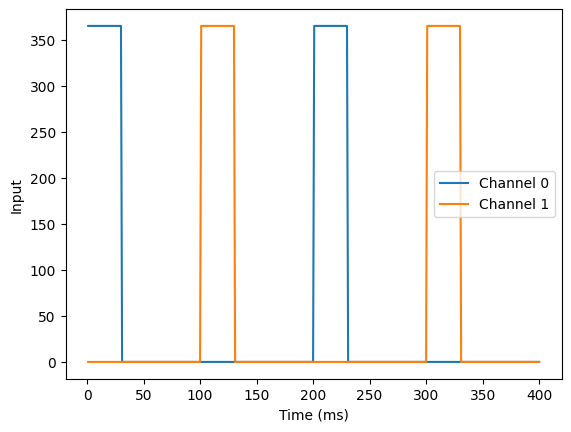

tensor([1., 1., 1., 1.], device='cuda:0')


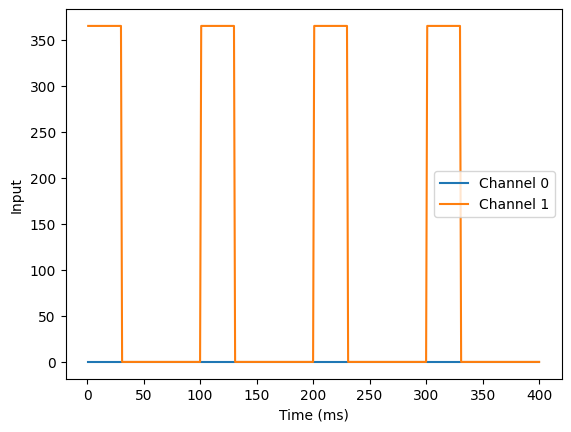

tensor([0., 0., 0., 1.], device='cuda:0')


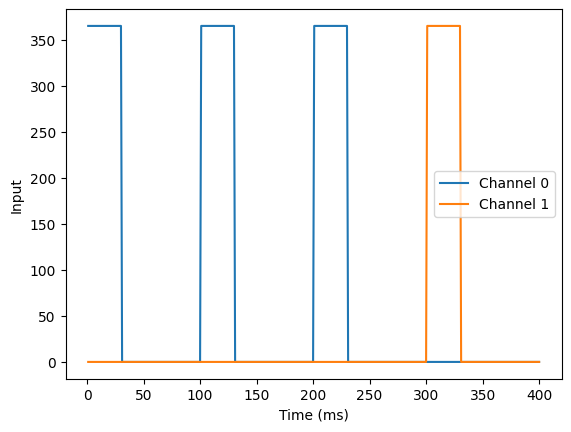

tensor([1., 0., 0., 0.], device='cuda:0')


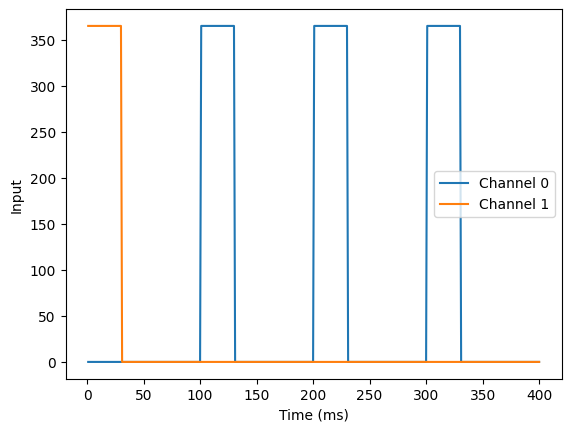

tensor([0., 0., 0., 0.], device='cuda:0')


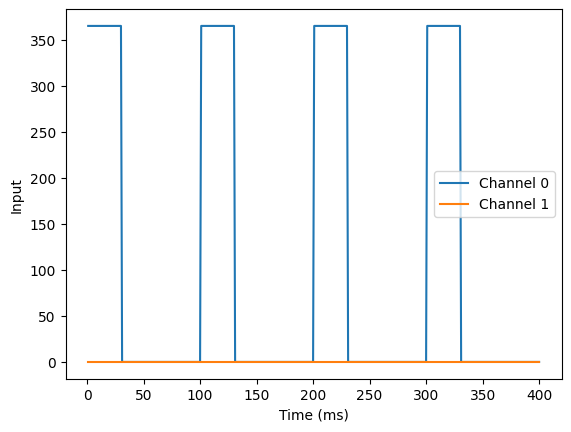

tensor([0., 1., 1., 1.], device='cuda:0')


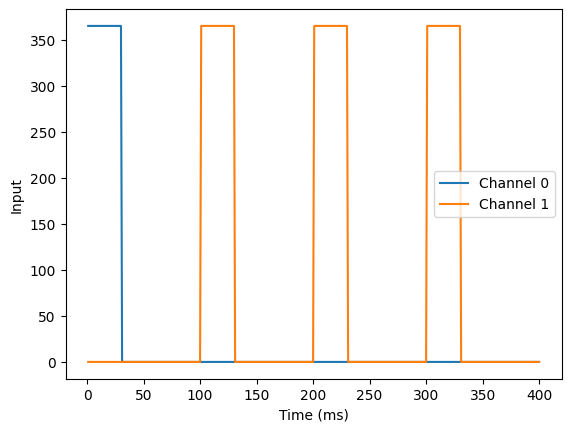

9
tensor([0., 0., 0., 0.], device='cuda:0')


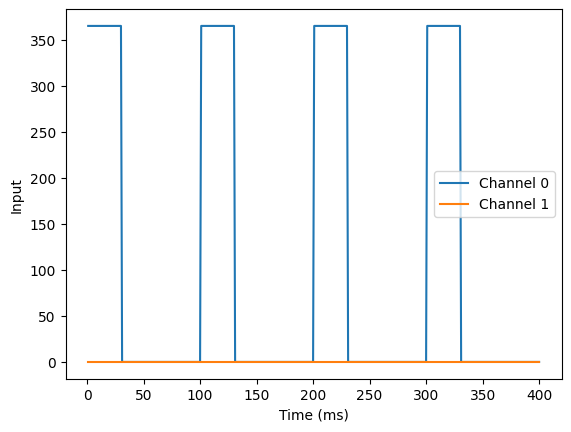

tensor([1., 1., 1., 1.], device='cuda:0')


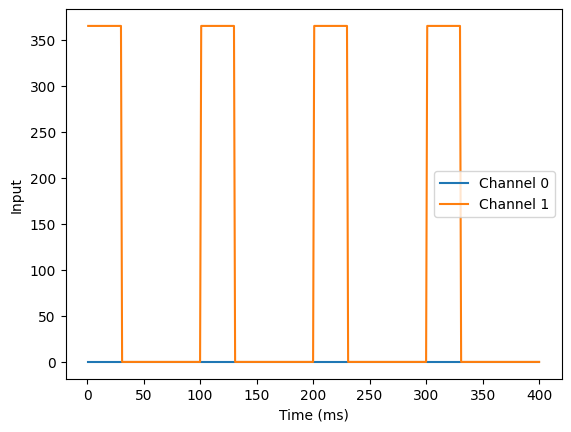

tensor([1., 0., 1., 0.], device='cuda:0')


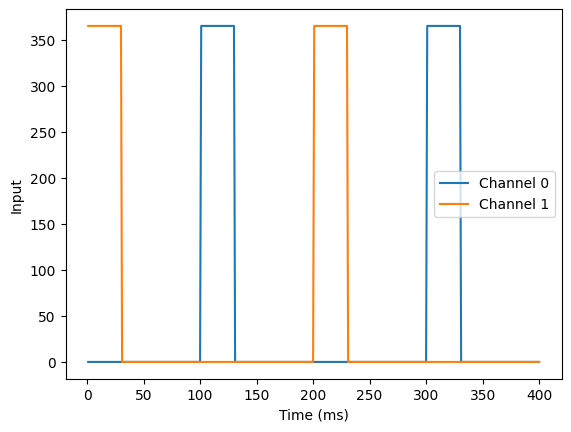

tensor([1., 0., 1., 0.], device='cuda:0')


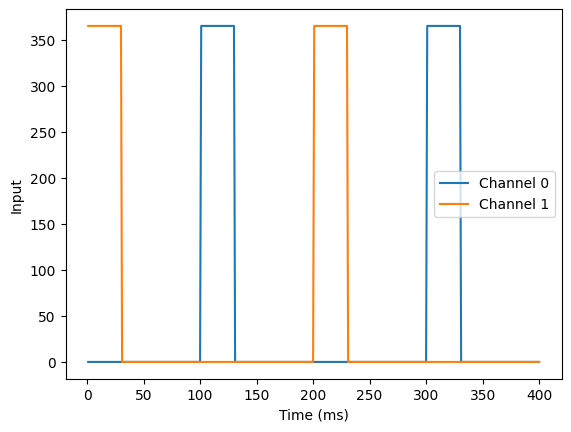

tensor([1., 0., 0., 0.], device='cuda:0')


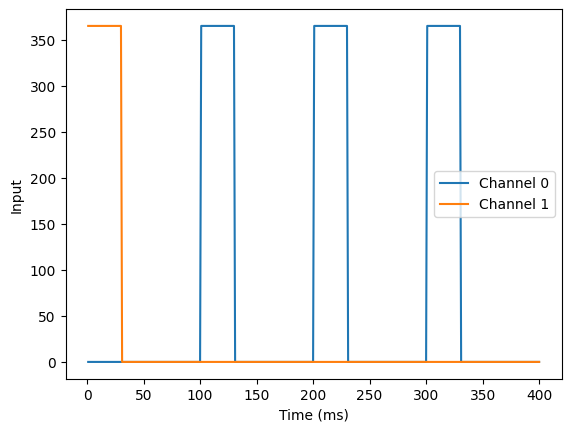

tensor([0., 1., 0., 1.], device='cuda:0')


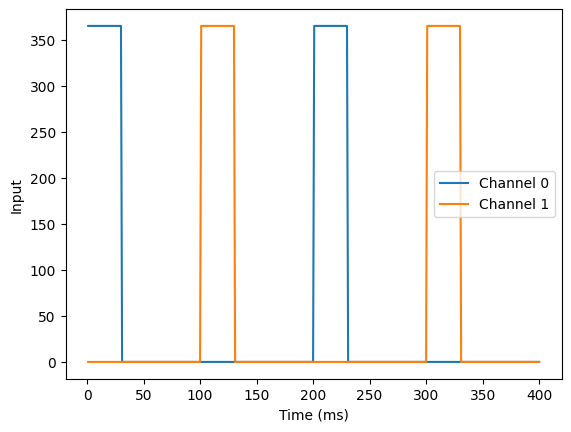

In [5]:
import data_setup
import train_parity
import plotting

iterable = train_parity.ParityDataGenerator(6, 4)
dataloader = data_setup.get_dataloader_from_iterable(iterable)

for i, (sequence, target) in enumerate(dataloader):
    if i == 10:
        break
    print(i)
    input_data = data_setup.generate_one_hot_impulses(sequence, 2, 1e-3)
    for b in range(6):
        print(sequence[b])
        plotting.plot_impulses(input_data, 1e-3, b)

In [11]:
import torch
a = torch.full((2, 2), 0)
b = torch.full((2, 2), 1)
c = torch.full((2, 2), 2)
d = torch.full((2, 2), 3)

x = torch.vstack((
    torch.hstack((a, b)),
    torch.hstack((c, d))
))
print(x)

tensor([[0, 0, 1, 1],
        [0, 0, 1, 1],
        [2, 2, 3, 3],
        [2, 2, 3, 3]])
